In [ ]:
import matplotlib.pyplot as plt 


In [ ]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """The applications for artificial intelligence are endless. The technology can be applied to many different sectors and industries. AI is being 
              ested and used in the healthcare industry for dosing drugs and different treatment in patients, and for surgical procedures in the operating room.
              Other examples of machines with artificial intelligence include computers that play chess and self-driving cars. Each of these machines must weigh 
              the consequences of any action they take, as each action will impact the end result. In chess, the end result is winning the game. For 
              self-driving cars, the computer 
              system must account for all external data and compute it to act in a way that prevents a collision.
              Artificial intelligence also has applications in the financial industry, where it is used to detect and flag activity in banking and finance 
              such as unusual debit card usage and large account deposits—all of which help a bank's fraud department. Applications for AI are also being 
              used to help streamline and make trading easier. This is done by making supply, demand, and pricing of securities easier to estimate
              When most people hear the term artificial intelligence, the first thing they usually think of is robots. That's because big-budget films and novels weave stories 
              about human-like machines that wreak havoc on Earth. But nothing could be further from the truth.
              Artificial intelligence is based on the principle that human intelligence can be defined in a way that a machine can easily mimic it and execute tasks, 
              from the most simple to those that are even more complex. The goals of artificial intelligence include learning, reasoning, and perception.
              As technology advances, previous benchmarks that defined artificial intelligence become outdated. For example, machines that calculate basic 
              functions or recognize text through optimal character recognition are no longer considered to embody artificial intelligence, since this function 
              is now taken for granted as an inherent computer function.
              AI is continuously evolving to benefit many different industries. Machines are wired using a cross-disciplinary approach based in mathematics, 
              computer science, linguistics, psychology, and more."""

In [ ]:

text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sentences = nltk.sent_tokenize(text)
sentences

['the applications for artificial intelligence are endless.',
 'the technology can be applied to many different sectors and industries.',
 'ai is being ested and used in the healthcare industry for dosing drugs and different treatment in patients, and for surgical procedures in the operating room.',
 'other examples of machines with artificial intelligence include computers that play chess and self-driving cars.',
 'each of these machines must weigh the consequences of any action they take, as each action will impact the end result.',
 'in chess, the end result is winning the game.',
 'for self-driving cars, the computer system must account for all external data and compute it to act in a way that prevents a collision.',
 "artificial intelligence also has applications in the financial industry, where it is used to detect and flag activity in banking and finance such as unusual debit card usage and large account deposits—all of which help a bank's fraud department.",
 'applications for 

In [ ]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [ ]:
sent_word

[['the',
  'applications',
  'for',
  'artificial',
  'intelligence',
  'are',
  'endless',
  '.'],
 ['the',
  'technology',
  'can',
  'be',
  'applied',
  'to',
  'many',
  'different',
  'sectors',
  'and',
  'industries',
  '.'],
 ['ai',
  'is',
  'being',
  'ested',
  'and',
  'used',
  'in',
  'the',
  'healthcare',
  'industry',
  'for',
  'dosing',
  'drugs',
  'and',
  'different',
  'treatment',
  'in',
  'patients',
  ',',
  'and',
  'for',
  'surgical',
  'procedures',
  'in',
  'the',
  'operating',
  'room',
  '.'],
 ['other',
  'examples',
  'of',
  'machines',
  'with',
  'artificial',
  'intelligence',
  'include',
  'computers',
  'that',
  'play',
  'chess',
  'and',
  'self-driving',
  'cars',
  '.'],
 ['each',
  'of',
  'these',
  'machines',
  'must',
  'weigh',
  'the',
  'consequences',
  'of',
  'any',
  'action',
  'they',
  'take',
  ',',
  'as',
  'each',
  'action',
  'will',
  'impact',
  'the',
  'end',
  'result',
  '.'],
 ['in',
  'chess',
  ',',
  'the

In [ ]:


for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [ ]:
sent_word

[['applications', 'artificial', 'intelligence', 'endless', '.'],
 ['technology', 'applied', 'many', 'different', 'sectors', 'industries', '.'],
 ['ai',
  'ested',
  'used',
  'healthcare',
  'industry',
  'dosing',
  'drugs',
  'different',
  'treatment',
  'patients',
  ',',
  'surgical',
  'procedures',
  'operating',
  'room',
  '.'],
 ['examples',
  'machines',
  'artificial',
  'intelligence',
  'include',
  'computers',
  'play',
  'chess',
  'self-driving',
  'cars',
  '.'],
 ['machines',
  'must',
  'weigh',
  'consequences',
  'action',
  'take',
  ',',
  'action',
  'impact',
  'end',
  'result',
  '.'],
 ['chess', ',', 'end', 'result', 'winning', 'game', '.'],
 ['self-driving',
  'cars',
  ',',
  'computer',
  'system',
  'must',
  'account',
  'external',
  'data',
  'compute',
  'act',
  'way',
  'prevents',
  'collision',
  '.'],
 ['artificial',
  'intelligence',
  'also',
  'applications',
  'financial',
  'industry',
  ',',
  'used',
  'detect',
  'flag',
  'activity',


In [ ]:

model = Word2Vec(sent_word, min_count=1)
words = model.wv.vocab

In [ ]:

vector = model.wv['computer']
print(vector)

[-5.60302520e-04  3.51156294e-03 -3.99137102e-03 -2.73494492e-03
 -3.10093374e-03  1.23871583e-03 -2.20133271e-03  4.49600350e-03
  4.37346660e-03 -9.78360069e-04  3.91807454e-03 -3.77214723e-03
 -7.85755983e-04 -1.16918923e-03  3.46200331e-03  3.72317503e-03
  4.31303866e-03 -2.37990776e-03 -4.69704438e-03 -6.53097173e-04
  2.62034056e-03 -1.26178516e-03 -3.15822940e-03 -1.22814532e-03
 -4.70706075e-03  3.24334996e-03 -4.69106053e-05  4.28858260e-03
  1.87111343e-03  2.63685803e-03 -2.91324104e-03  2.48138211e-04
 -4.17312048e-03  4.43408964e-03 -1.06843887e-03 -8.88652576e-04
 -1.89110346e-03  4.00049705e-03 -3.98837915e-03  2.49152188e-03
  2.64902459e-03 -2.62469193e-03  1.44822523e-03 -2.47669034e-03
 -3.76031338e-03 -4.78043128e-03 -2.57507456e-03  5.47044619e-05
  4.41543665e-03  6.72788650e-04  4.75533307e-03  3.89693864e-03
  4.82542440e-03  6.56548131e-04 -2.88374629e-03 -4.42608586e-03
 -1.74863046e-04 -1.07333362e-04 -2.88473745e-03 -2.75477814e-03
 -2.47393036e-03 -3.97877

In [ ]:

similar = model.wv.most_similar('computer',topn=5)

similar

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('intelligence', 0.26856446266174316),
 ('machines', 0.25653547048568726),
 ('think', 0.24363046884536743),
 ('wired', 0.21237818896770477),
 ('robots', 0.1929091215133667)]

In [ ]:

model.wv.similarity(w1='computer',w2='machine')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.1410899

In [ ]:

model.wv.doesnt_match(
["data","machine","computer","artificial","learning","deep","application","programme","binary","longer","function","table"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'data'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


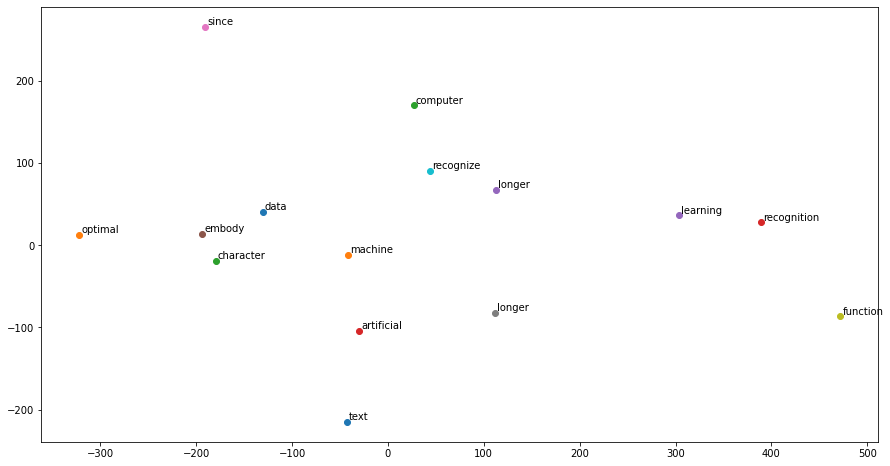

In [ ]:
from sklearn.manifold import  TSNE
vocab = ["data","machine","computer","artificial","learning","embody","since","longer","function",'recognize',
  'text',
  'optimal',
  'character',
  'recognition',
  'longer']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)